In [3]:
import nltk
import matplotlib.pyplot as plt
import os
import numpy as np

In [111]:
from nltk import Text
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tag import pos_tag
from nltk.corpus import brown, gutenberg

In [698]:
corpus = gutenberg.open(gutenberg.fileids()[0]).read()

In [699]:
text = Text(word_tokenize(corpus))

In [320]:
ttext = Text(["/".join(_) for _ in pos_tag(corpus)])

# zipf's law

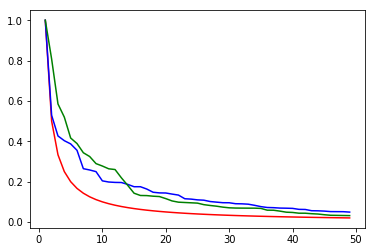

In [321]:
import matplotlib.pyplot as plt

_max = text.vocab()[text.vocab().max()]
_tmax = ttext.vocab()[ttext.vocab().max()]

# x = range(1, text.vocab().B())
x = range(1,50) # 50개 정도만 해보자.
y = [1/_ for _ in x]
yy = [_[1]/_max for _ in text.vocab().most_common(49)]
yyy = [_[1]/_tmax for _ in ttext.vocab().most_common(49)]

plt.plot(x,y,'r-')
plt.plot(x,yy,'b-')
plt.plot(x,yyy,'g-')

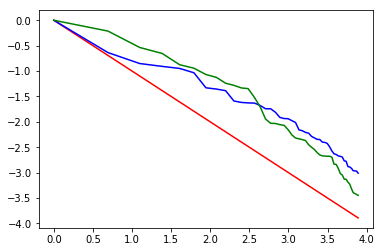

In [322]:
from math import log
# 각 값에 log를 씌운다.
# 순위의 역순은 값이 커질수록 0에 수렴하게 되므로 계산 용이성을 위해서 log를 씀.

_x = [log(_) for _ in x]
_y = [log(_) for _ in y]
_yy = [log(_) for _ in yy]
_yyy = [log(_) for _ in yyy]

plt.plot(_x, _y, "r-")
plt.plot(_x, _yy, "b-")
plt.plot(_x, _yyy, "g-")
plt.show()

> log를 씌워서 그래프 모양을 바꾸면 일치하는 정도를 더 직관적으로 볼 수 있다.

In [324]:
text.vocab()

FreqDist({',': 12016, '.': 6355, 'to': 5125, 'the': 4844, 'and': 4653, 'of': 4272, 'I': 3177, '--': 3100, 'a': 3001, "''": 2452, ...})

In [323]:
# .freq는 frequency인데, 빈도가 아니라 전체 token에서의 비율을 나타낸다.

text.vocab().freq(',')

0.06265349219177725

In [336]:
# .most_common(10): 가장 많이 사용된 token를 10개 가져온다.

text.vocab().most_common(10)

[(',', 12016),
 ('.', 6355),
 ('to', 5125),
 ('the', 4844),
 ('and', 4653),
 ('of', 4272),
 ('I', 3177),
 ('--', 3100),
 ('a', 3001),
 ("''", 2452)]

In [325]:
# 앞 순위 token 50개가 전체에서 차지하는 비율을 보자. 

_sum = 0.0
for _ in text.vocab().most_common(50):
    _sum += text.vocab().freq(_[0])
    print(_[0], _[1], text.vocab().freq(_[0]))
print("상위 50개 corpus가 전체에서 차지하는 비율:", _sum)

, 12016 0.06265349219177725
. 6355 0.03313606382146675
to 5125 0.026722632114086087
the 4844 0.025257449748416195
and 4653 0.024261542873530256
of 4272 0.022274943295878195
I 3177 0.016565424824673464
-- 3100 0.016163933571447194
a 3001 0.015647730531584848
'' 2452 0.012785150037802747
was 2383 0.012425372161535051
her 2360 0.012305446202779154
; 2353 0.012268946997940402
not 2242 0.011690173892640196
in 2103 0.010965403967984982
it 2103 0.010965403967984982
be 1965 0.010245848215449592
she 1774 0.009249941340563651
`` 1735 0.009046588627890607
that 1729 0.009015303595171676
you 1664 0.008676382407383268
had 1605 0.00836874625231379
as 1387 0.007232056730192664
he 1365 0.0071173449435565864
for 1320 0.0068827071981646115
have 1301 0.006783637927887999
is 1221 0.006366504158302266
with 1185 0.006178793961988685
very 1151 0.006001512109914748
but 1148 0.0059858695935552835
Mr. 1091 0.005688661782725448
his 1084 0.0056521625778866965
! 1063 0.005542664963370441
at 996 0.005193315431342388

> 상위 50개 corpus가 전체에서 차지하는 비율: 0.5160153296660321

In [ ]:
# 후순위를 따져보자.

sorted(text.vocab().values()) # 오름차순으로 정렬함. 
                              # 사용 수가 적은 것부터 큰 순서로 정렬됨

In [326]:
# 후순위를 따져보자.

total = 0
for i , _ in enumerate(sorted(text.vocab().values())):
    # 사용 횟수가 20회 미만인 것만 고른다.
    if _ > 20:
        print(i)
        break
    # 각 corpus의 사용 횟수를 모두 더한다.
    total += _
print(total)

7579
25043


> 사용 횟수가 20회 미만인 corpus의 갯수는 7579개 이고,
> 20회 미만인 corpus의 사용 횟수 합은 25043회 이다.

In [328]:
text.vocab().B(), text.vocab().N()

(8406, 191785)

In [331]:
7579/text.vocab().B(), 25043/text.vocab().N()

(0.9016178919819177, 0.1305785123966942)

> 사용 횟수가 20회 미만인 corpus는 전체 corpus 갯수에서 약 90%를 차지하고, 
> 사용 횟수는 전체에서 약 13%를 차지한다.

---

# KoNLpy

In [337]:
# 한국어 corpus 데이터셋

from konlpy.corpus import kolaw, kobill
kolaw.fileids(), kobill.fileids()

(['constitution.txt'],
 ['1809890.txt',
  '1809891.txt',
  '1809892.txt',
  '1809893.txt',
  '1809894.txt',
  '1809895.txt',
  '1809896.txt',
  '1809897.txt',
  '1809898.txt',
  '1809899.txt'])

In [338]:
kcorpus = kolaw.open(kolaw.fileids()[0]).read()

In [339]:
# python 자체기능으로 단어와 문장을 뽑아보면 다음과 같다.

len(kcorpus.split()), len(kcorpus.splitlines())

(4178, 356)

In [340]:
# nltk의 tokenizer를 이용해서 단어와 문장을 뽑으면 다음과 같다.

len(word_tokenize(kcorpus)), len(sent_tokenize(kcorpus))

(4640, 357)

In [342]:
# unique한 token의 갯수는 2023개이다.

ktext = Text(word_tokenize(kcorpus))
ktext.vocab().N(), ktext.vocab().B()

(4640, 2023)

In [343]:
# 상위

_sum = 0.0
for _ in  ktext.vocab().most_common(30):
    _sum += ktext.vocab().freq(_[0])
    print(_[0], _[1], ktext.vocab().freq(_[0]))
print(_sum)

. 357 0.07693965517241379
, 101 0.021767241379310343
수 87 0.01875
① 75 0.016163793103448277
또는 70 0.015086206896551725
의하여 66 0.014224137931034483
법률이 57 0.01228448275862069
있다 57 0.01228448275862069
한다 56 0.01206896551724138
정하는 50 0.010775862068965518
그 44 0.009482758620689655
때에는 42 0.009051724137931035
관한 39 0.008405172413793103
바에 37 0.007974137931034483
국민은 35 0.007543103448275862
모든 30 0.00646551724137931
법률로 30 0.00646551724137931
정한다 28 0.00603448275862069
위하여 26 0.005603448275862069
가진다 25 0.005387931034482759
아니한다 25 0.005387931034482759
및 25 0.005387931034482759
이 24 0.005172413793103448
국회의 23 0.004956896551724138
필요한 21 0.004525862068965518
없다 21 0.004525862068965518
기타 21 0.004525862068965518
대통령은 19 0.004094827586206897
하며 18 0.003879310344827586
헌법에 17 0.003663793103448276
0.32887931034482754


In [345]:
# 후순위를 따져보자.

total = 0
for i , _ in enumerate(sorted(ktext.vocab().values())): 
    # 사용 수가 20개 미만인 것만 고른다.
    if _ > 20:
        print(i)
        break        
    total += _
print(total)

1996
3168


---

# KoNLpy의 형태소 분석기 (Kkma: 꼬마)

In [60]:
from konlpy.tag import Kkma

In [70]:
ktext = Text(Kkma().pos(kcorpus))

In [71]:
# 형태소와 품사 태그로 이루어져있다.

ktext.vocab().most_common(20)

[(('의', 'JKG'), 532),
 (('.', 'SF'), 359),
 (('하', 'XSV'), 350),
 (('에', 'JKM'), 328),
 (('ㄴ다', 'EFN'), 243),
 (('ㄴ', 'ETD'), 234),
 (('을', 'JKO'), 211),
 (('은', 'JX'), 182),
 (('는', 'JX'), 180),
 (('저', 'NP'), 155),
 (('여', 'ECS'), 149),
 (('·', 'SP'), 145),
 (('ㄹ', 'ETD'), 141),
 (('를', 'JKO'), 135),
 (('이', 'JKS'), 131),
 (('법률', 'NNG'), 121),
 (('하', 'VV'), 103),
 ((',', 'SP'), 101),
 (('있', 'VV'), 98),
 (('는', 'ETD'), 97)]

In [72]:
ktext.vocab().N(), ktext.vocab().B()

(10053, 1294)

> word_tokenize가 (4640, 2023)개로 나누었었는데, Kkma는 총 token 10,053개, unique한 token 1,294개로 나누었다.
>
> 형태소 분석 결과 유니크한 단어 수는 줄고, 전체 단어 수는 늘었다.

In [73]:
# token 순위 상위 30개의 사용 비율을 보자.

_sum = 0.0
for _ in  ktext.vocab().most_common(30):
    _sum += ktext.vocab().freq(_[0])
    print(_[0], _[1], ktext.vocab().freq(_[0]))
print(_sum)

('의', 'JKG') 532 0.05291952650949965
('.', 'SF') 359 0.03571073311449319
('하', 'XSV') 350 0.03481547796677609
('에', 'JKM') 328 0.03262707649457873
('ㄴ다', 'EFN') 243 0.024171888988361683
('ㄴ', 'ETD') 234 0.023276633840644583
('을', 'JKO') 211 0.02098875957425644
('은', 'JX') 182 0.018104048542723565
('는', 'JX') 180 0.017905102954341987
('저', 'NP') 155 0.015418283099572267
('여', 'ECS') 149 0.014821446334427535
('·', 'SP') 145 0.01442355515766438
('ㄹ', 'ETD') 141 0.014025663980901224
('를', 'JKO') 135 0.01342882721575649
('이', 'JKS') 131 0.013030936038993335
('법률', 'NNG') 121 0.012036208097085447
('하', 'VV') 103 0.010245697801651249
(',', 'SP') 101 0.01004675221326967
('있', 'VV') 98 0.009748333830697304
('는', 'ETD') 97 0.009648861036506515
('되', 'XSV') 96 0.009549388242315727
('다', 'EFN') 88 0.008753605888789416
('정하', 'VV') 88 0.008753605888789416
('수', 'NNB') 87 0.008654133094598627
('대통령', 'NNG') 84 0.008355714712026261
('의하', 'VV') 83 0.008256241917835472
('조', 'NR') 78 0.007758877946881

In [346]:
# 빈도가 2도 안되는 단어들
total = 0
for i,_ in enumerate(sorted(ktext.vocab().values())):
    if _ > 3: 
        print(i)
        break
    total += _
print(total)

1873
2308


> 형태소 분석을 한 결과를 이용하는 것이 중순위의 단어들을 찾는데 더 유리하다.

---

# heaps' law
- corpus를 적절히 잘 모았는가 검증할 때 사용할 수 있는 법칙

- 코퍼스에서 어휘의 갯수를 M, 토큰의 갯수를 T 라고 하면 다음이 성립한다.
$$
M = kT^b
$$
- k는 10 ~ 100 사이다.
- b는 0.4 ~0.6 사이다.
- 경험적 법칙이므로 증명 x

In [700]:
k = 20 # 10 ~ 100 사이
b = 0.5 # 0.4 ~ 0.6 사이
m = k * text.vocab().N() ** b # : 유니크한 단어의 수와 같다.
heaps = lambda x:k*x**b
text.vocab().N(), text.vocab().B(), m

(191785, 8406, 8758.652864453528)

In [355]:
corpus2 = gutenberg.open(gutenberg.fileids()[1]).read()
text2 = Text(word_tokenize(corpus2))

In [356]:
# 다른 corpus에서도 식이 성립한다.

text2.vocab().N(), text2.vocab().B(), heaps(text2.vocab().N())

(97920, 6235, 6258.434308994542)

In [668]:
x = list()
y = [] # 진짜 유니크한 단어의 수
yy = [] # heaps로 예측한 유니크한 단어의 수
for _ in gutenberg.fileids():
    _corpus = gutenberg.open(_).read()
    _text = Text(word_tokenize(_corpus))
    T = _text.vocab().N()
    M = _text.vocab().B()
    x.append(sum(x)+T) # corpus를 열 때마다 전체 단어의 수가 누적될 것
    y.append(sum(y)+M)
    yy.append(sum(yy)+heaps(T))

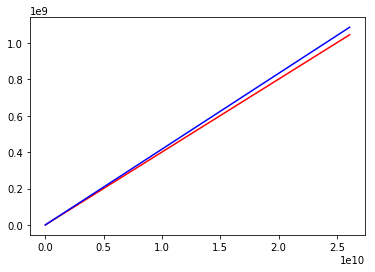

In [669]:
plt.plot(x,y,'r-')
plt.plot(x,yy,'b-')

> #### 수업 때 했던 방식에 오류가 있는 것 같다!
> 1. heaps' law는 log 방정식과 비슷하게 생겼는데, 위 그래프는 직선이다. 그래프 개형이 이상한거 같다.
> 2. x를 append하는 과정에서 sum(x)+T를 하면, 앞 쪽 corpus의 token 갯수가 중복으로 계속 더해지게 된다.
> 3. y를 append하는 과정에서 sum(y)+M을 하면, 각 corpus의 unique한 단어의 갯수들이 계속 더해지게 된다. 이때, 앞 쪽 corpus의 unique 토큰과 중복되는 unique 토큰을 검토하지 않게 된다. unique 토큰이 unique하지 않게 계산되는 문제가 생긴다.
> 4. heaps(T)를 계산할때, 수집한 corpus 전체의 token이 아니라, 현재 열람중인 corpus의 token 갯수만 반영하는 문제가 있다.


In [543]:
# token 갯수가 중복으로 더해지는 것을 증명

x = []
totalT = []

for _ in gutenberg.fileids():
    _corpus = gutenberg.open(_).read()
    _text = Text(word_tokenize(_corpus))
    T = _text.vocab().N()
    x.append(sum(x)+T)
    totalT.append(T)

In [545]:
# x의 마지막 값은 전체 corpus의 token 갯수여야 하는데,
# 각 corpus의 token 갯수 합(=전체 corups의 token 갯수)보다 한참 크다.

x[-1], sum(totalT)

(26085972628, 2538810)

#### 오류를 수정해보자.

In [681]:
k = 100
b = 0.4

xcount = []
x = []
Bs= set()
unique = []
heapsPred = []

for _ in gutenberg.fileids():
    _corpus = gutenberg.open(_).read()
    _text = Text(word_tokenize(_corpus))
    
    xcount.append(_text.vocab().N())
    x.append(sum(xcount))
    Bs = Bs | set(_text.vocab().keys())
    unique.append(len(Bs))
    heapsPred.append(k*x[-1]**b)

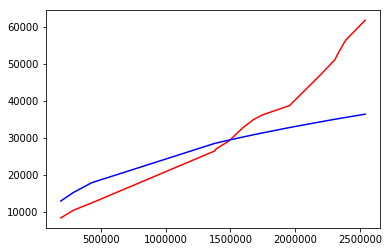

In [682]:
plt.plot(x, unique, "r-")
plt.plot(x, heapsPred, "b-")
# plt.xticks(x, labels=range(len(x)))

> heaps' law가 적용되지 않았다.
> 
> 규칙이 들어맞으면 balanced라고 하고, corpus를 적절하게 수집했다고 할 수 있다.
>
> gutenberg는 corpus가 18개밖에 되지 않아서, corpus가 충분하지 않은 탓에 unbalanced한 것 같다.

In [670]:
# gutenberg의 corpus 갯수

len(gutenberg.fileids())

18

---

### brown corpus로 해보자
- brown은 corpus가 500개이다.

In [694]:
k = 14
b = 0.6

xcount = []
x = []
Bs= set()
unique = []
heapsPred = []

for _ in brown.fileids():
    _corpus = brown.open(_).read()
    _text = Text(word_tokenize(_corpus))
    
    xcount.append(_text.vocab().N())
    x.append(sum(xcount))
    Bs = Bs | set(_text.vocab().keys())
    unique.append(len(Bs))
    heapsPred.append(k*x[-1]**b)

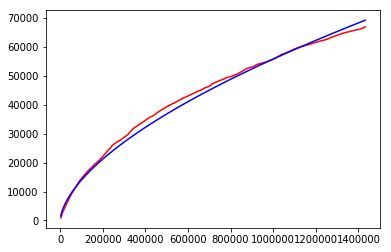

In [695]:
plt.plot(x, unique, "r-")
plt.plot(x, heapsPred, "b-")
# plt.xticks(x, labels=range(len(x)))

### Log

양변에 로그를 취하면 
$$
logM = log k + b* log T
$$
 가 되고, 선형 그래프로 비교할 수 있다.

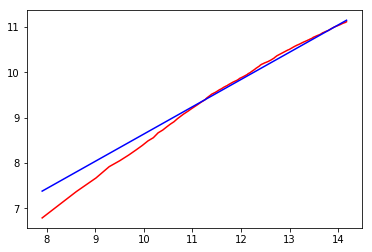

In [696]:
from math import log

x_ = [log(_) for _ in x]
unique_ = [log(_) for _ in unique]
heapsPred_ = [log(_) for _ in heapsPred]

plt.plot(x_, unique_, "r-")
plt.plot(x_, heapsPred_, "b-")

---

## 한글로 heaps' law 해보자

In [701]:
kcorpus1 = kobill.open(kobill.fileids()[0]).read()
ktext1 = Text(word_tokenize(kcorpus1))
ktext1.vocab().N(), ktext1.vocab().B()

(1124, 536)

In [702]:
# 아까 만들었던 heaps 함수를 그대로 써보자.
# 값 조정이 필요할 것 같다.

heaps(ktext1.vocab().N())

670.5221845696085

In [138]:
kheaps = lambda x:15*x**0.5
kheaps(ktext1.vocab().N())

502.8916384272063

In [707]:
kheaps = lambda x:20*x**0.5

eachTotal = []
eachUnique = set()

x = []
y = []
yy = []

for _ in kobill.fileids():
    _corpus = kobill.open(_).read()
    _text = Text(word_tokenize(_corpus))
    
    T = _text.vocab().N()
    
    eachTotal.append(T)
    eachUnique = eachUnique | set(_text.vocab().keys())
    x.append(sum(eachTotal))
    y.append(len(eachUnique))
    yy.append(kheaps(x[-1]))

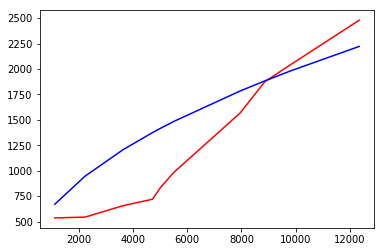

In [708]:
plt.plot(x,y, "r-")
plt.plot(x, yy, "b-")
plt.show()

---

## crawling한 news로 heaps' law 해보자

In [141]:
import os 

base = "practice/8일차_실습_project/헤드라인/"
len([_ for _ in os.listdir(base) if _.startswith("정치-")]) # 30개

30

In [218]:
nheaps = lambda x:15*x**0.5

In [703]:
files = [_ for _ in os.listdir(base)
       if _.startswith("정치-")]

with open(base+files[0], encoding="utf-8") as fp:
    c1 = fp.read()
t1 = Text(word_tokenize(c1))

In [704]:
t1.vocab().N(), t1.vocab().B(), nheaps(t1.vocab().N())

(584, 413, 362.49137920783716)

In [705]:
with open(base+files[0], encoding="utf-8") as fp:
    c2 = fp.read()
t2 = Text(word_tokenize(c2))

t2.vocab().N(), t2.vocab().B(), nheaps(t2.vocab().N())

(584, 413, 362.49137920783716)

In [711]:
nheaps = lambda x:16*x**0.6

eachTotal = []
eachUnique = set()

x = []
y = []
yy = []

for _ in files:
    with open(base+_, encoding="utf-8") as fp:
        _corpus = fp.read()
    _text = Text(word_tokenize(_corpus))
    
    T = _text.vocab().N()
    
    eachTotal.append(T)
    eachUnique = eachUnique | set(_text.vocab().keys())
    
    x.append(sum(eachTotal))
    y.append(len(eachUnique))
    yy.append(nheaps(x[-1]))

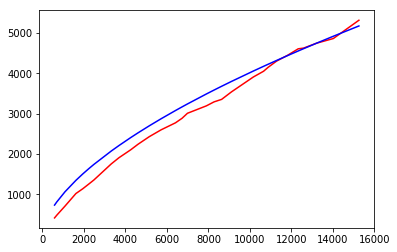

In [712]:
plt.plot(x,y, "r-")
plt.plot(x, yy, "b-")
plt.show()

---

# N-gram
    - 조건부확률 개념
    - 앞에 나온 단어를 바탕으로 뒤에 나올 단어를 예측하는 언어모델

In [270]:
def eojeol(sentence, n=2):
    ngram = []
    tokens = word_tokenize(sentence)
    for i in range(len(tokens)-(n-1)):
        ngram.append(tuple(tokens[i:i+n]))
    return ngram

In [271]:
# test
eojeol("우주소녀 우주 소녀 우주소녀 우주소녀")

[('우주소녀', '우주'), ('우주', '소녀'), ('소녀', '우주소녀'), ('우주소녀', '우주소녀')]

In [740]:
sentences = """A B C D
A C D
B C
B C D
A C
A D
"""

tokens = {}
for _ in sentences.splitlines(): 
    for ngram in eojeol(_):
        if ngram in tokens:
            tokens[ngram] += 1
        else: tokens[ngram] = 1
tokens

{('A', 'B'): 1, ('B', 'C'): 3, ('C', 'D'): 3, ('A', 'C'): 2, ('A', 'D'): 1}

P(C|A) = P(A,C) \ P(A)

In [734]:
# P(A)를 구하려면

unigram = {}
for _ in sentences.split():
    if _ in unigram:
        unigram[_] += 1
    else:
        unigram[_] = 1

In [735]:
unigram

{'A': 4, 'B': 3, 'C': 5, 'D': 4}

In [737]:
P_unigram = lambda x:unigram[x]/sum(ngram.values())
P_bigram = lambda x,s: ngram[x]/sum([ngram])
# P_unigram("A")

In [722]:
temp = {k:v for k,v in tokens.items() if k[0] == "A"}
_sum = sum(temp.values())
for _ in temp:
    print(_, temp[_]/_sum)

('A', 'B') 0.25
('A', 'C') 0.5
('A', 'D') 0.25


In [731]:
def umjeol(sentence, n=2):
    ngram = []
    tokens = list(sentence.replace(" ", "_"))
    for i in range(len(tokens)-(n-1)):
#         ngram.append(tuple(tokens[i:i+n]))
        ngram.append("".join(tokens[i:i+n]))
#     print(ngram)
    return ngram

In [732]:
umjeol("A B C D")

['A_', '_B', 'B_', '_C', 'C_', '_D']

In [741]:
umjeol(sentences.splitlines()[0])

['A_', '_B', 'B_', '_C', 'C_', '_D']

---

In [757]:
# 2음절 단위로 쪼갠 것을 bigram(바이그램)이라고 한다.

sentences = """띄어쓰기 예제
띄어쓰기예제
띄어 쓰기 예제
쓰기 예제
쓰레기 예제
띄어 쓰기예제"""
bigram = {}
for _ in sentences.splitlines():
    for t in umjeol(_):
        if t in bigram:
            bigram[t] += 1
        else:
            bigram[t] = 1

In [758]:
bigram

{'띄어': 4,
 '어쓰': 2,
 '쓰기': 5,
 '기_': 4,
 '_예': 4,
 '예제': 6,
 '기예': 2,
 '어_': 2,
 '_쓰': 2,
 '쓰레': 1,
 '레기': 1}

In [748]:
# 1음절 단위로 쪼갠 것을 unigram(유니그램)이라고 한다.
# 3음절은 단위는 trigram(트라이그램)
# 4 이상 N개 단위로 쪼갠 것은 N-gram이라고 한다.

unigram = {}

for _ in sentences.splitlines():
    for t in umjeol(_, 1):
        if t in bigram:
            bigram[t] += 1
        else:
            bigram[t] = 1

In [752]:
unigram

{'띄': 4, '어': 4, '쓰': 6, '기': 6, '_': 6, '예': 6, '제': 6, '레': 1}

In [755]:
# umjeol 함수를 안 쓰고 unigram 만들기

unigram = {}

for _ in sentences.splitlines():
    for t in list(_.replace(" ","_")):
        if t in unigram:
            unigram[t] += 1
        else:
            unigram[t] = 1

unigram

{'띄': 4, '어': 4, '쓰': 6, '기': 6, '_': 6, '예': 6, '제': 6, '레': 1}

## N-gram으로 단어 예측해보기

In [762]:
# 다음과 같은 절차를 응용할 수 있다.

sumUni = sum(unigram.values())
sumBi = sum(bigram.values())

for _ in umjeol("띄어쓰기예제"):
    p1 = unigram[_[0]]/sumUni # 첫번째 글자가 나올 확률
    sub = {k:v for k,v in bigram.items() # 첫번째 글자 다음에 나올 수 있는 단어들을 추린다.
                   if k[0]==_[0]}
    subDict = dict()
    sumSub = sum(sub.values()) # 첫번째 글자에 이어서 나올 수 있는 모든 경우의 수를 합한다.
    for k,v in sub.items():
        subDict[k] = v/sumSub # 첫번째 글자에 이어서 나올 수 있는 각 경우에 대한 확률을 계산.(해당 경우의 수/ 모든 경우의 수)
    print(_, p1, subDict)

띄어 0.10256410256410256 {'띄어': 1.0}
어쓰 0.10256410256410256 {'어쓰': 0.5, '어_': 0.5}
쓰기 0.15384615384615385 {'쓰기': 0.8333333333333334, '쓰레': 0.16666666666666666}
기예 0.15384615384615385 {'기_': 0.6666666666666666, '기예': 0.3333333333333333}
예제 0.15384615384615385 {'예제': 1.0}


In [777]:
# 띄어쓰기 예측하기

sumUni = sum(unigram.values())
sumBi = sum(bigram.values())
result = []

for _ in list("띄어쓰기쓰레기예제"): # 이 단어를 자동 띄어쓰기로 만들 예정
    p1 = unigram[_] / sumUni
    sub = {k:v for k,v in bigram.items()
                  if k[0] ==_}
    subDict = {}
    sumSub = sum(sub.values())
    for k, v in sub.items():
        subDict[k[-1]] = p1 * (v/sumSub) # 조건부 확률
    result.append(_)
    if subDict:
        print('"{}"가 나올 확률:'.format(_), p1)
        print("Next Predicts: ", subDict)
        print("Most Possible:",max(subDict, key=subDict.get))
        if max(subDict, key=subDict.get) == "_":
            result.append(" ")
print("\nResult:", "".join(result))

"띄"가 나올 확률: 0.10256410256410256
Next Predicts:  {'어': 0.10256410256410256}
Most Possible: 어
"어"가 나올 확률: 0.10256410256410256
Next Predicts:  {'쓰': 0.05128205128205128, '_': 0.05128205128205128}
Most Possible: 쓰
"쓰"가 나올 확률: 0.15384615384615385
Next Predicts:  {'기': 0.12820512820512822, '레': 0.02564102564102564}
Most Possible: 기
"기"가 나올 확률: 0.15384615384615385
Next Predicts:  {'_': 0.10256410256410256, '예': 0.05128205128205128}
Most Possible: _
"쓰"가 나올 확률: 0.15384615384615385
Next Predicts:  {'기': 0.12820512820512822, '레': 0.02564102564102564}
Most Possible: 기
"레"가 나올 확률: 0.02564102564102564
Next Predicts:  {'기': 0.02564102564102564}
Most Possible: 기
"기"가 나올 확률: 0.15384615384615385
Next Predicts:  {'_': 0.10256410256410256, '예': 0.05128205128205128}
Most Possible: _
"예"가 나올 확률: 0.15384615384615385
Next Predicts:  {'제': 0.15384615384615385}
Most Possible: 제

Result: 띄어쓰기 쓰레기 예제
